In [1]:
# Installing the relevant libraries
!pip install pandas seaborn matplotlib scikit-learn xgboost scikit-plot imbalanced-learn

You should consider upgrading via the 'C:\Users\jhsib\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import scikitplot as skplt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, auc, roc_curve

## Data Preprocessing

In [3]:
df = pd.read_csv('US_Americasbarometer_2017.csv')
df.drop(columns = df.columns[0], axis = 1, inplace = True)
df.drop(['q12m', 'q12f', 'q1', 'q2'], axis = 1, inplace = True) 
#drop vb3n because it is the output, q12m and q12f because too many na, q1 and q2 because question is not in given questionnaire
df.dropna(inplace = True)
y = df['vb3n']
df.drop(['vb3n'], axis = 1, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117 entries, 0 to 1498
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ls3       1117 non-null   float64
 1   a4        1117 non-null   int64  
 2   soct2     1117 non-null   float64
 3   idio2     1117 non-null   float64
 4   np1       1117 non-null   float64
 5   it1       1117 non-null   float64
 6   l1b       1117 non-null   float64
 7   prot3     1117 non-null   float64
 8   vic1ext   1117 non-null   float64
 9   aoj11     1117 non-null   float64
 10  b1        1117 non-null   float64
 11  b2        1117 non-null   float64
 12  b3        1117 non-null   float64
 13  b4        1117 non-null   float64
 14  b6        1117 non-null   float64
 15  b43       1117 non-null   float64
 16  b12       1117 non-null   float64
 17  b13       1117 non-null   int64  
 18  b18       1117 non-null   int64  
 19  b21       1117 non-null   int64  
 20  b21a      1117 non-null   int6

In [5]:
df

,ls3,a4,soct2,idio2,np1,it1,l1b,prot3,vic1ext,aoj11,...,q5a,q5b,q3c,q10new,q11n,q12bn,q12,etid,www1,gi0
0,1.0,59,2.0,2.0,1.0,2.0,4.0,2.0,2.0,1.0,...,5.0,4.0,11.0,16.0,2.0,0.0,0.0,1.0,1,1
1,2.0,10,1.0,3.0,2.0,2.0,3.0,2.0,2.0,1.0,...,5.0,4.0,11.0,15.0,5.0,1.0,1.0,1.0,1,1
2,1.0,13,1.0,1.0,1.0,2.0,10.0,2.0,2.0,1.0,...,2.0,1.0,6.0,15.0,2.0,5.0,7.0,1.0,1,1
3,3.0,15,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,14.0,2.0,0.0,3.0,1.0,1,1
4,4.0,16,1.0,2.0,2.0,3.0,10.0,2.0,2.0,1.0,...,5.0,3.0,4.0,15.0,4.0,0.0,0.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,2.0,21,1.0,1.0,1.0,2.0,9.0,1.0,1.0,2.0,...,2.0,2.0,7.0,7.0,3.0,0.0,0.0,1.0,2,1
1495,2.0,15,3.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,...,3.0,2.0,1.0,11.0,6.0,2.0,2.0,4003.0,1,2
1496,2.0,2,3.0,2.0,2.0,1.0,6.0,2.0,2.0,2.0,...,5.0,3.0,1.0,8.0,1.0,0.0,0.0,1.0,1,2
1497,1.0,21,2.0,1.0,1.0,2.0,6.0,1.0,1.0,2.0,...,1.0,1.0,2.0,1.0,1.0,3.0,0.0,1.0,1,2


<AxesSubplot:>

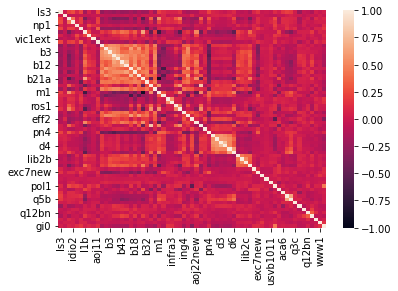

In [6]:
#Colinearity plot
cor = df.corr()
sns.heatmap(cor, vmin = -1)

In [7]:
#Look for high colinearity and drop columns
greater = cor.le(-0.9)
for i in range(0,30):
    for j in range(0,30):
        if i == j:
            continue
        elif greater.iloc[i][j]:
            print(i, j)

20 24
24 20


In [8]:
greater = cor.ge(0.9)
for i in range(0,30):
    for j in range(0,30):
        if i == j:
            continue
        elif greater.iloc[i][j]:
            print(i, j)

In [9]:
df.drop(columns = df.columns[20], inplace = True, axis = 1)

<AxesSubplot:xlabel='vb3n', ylabel='count'>

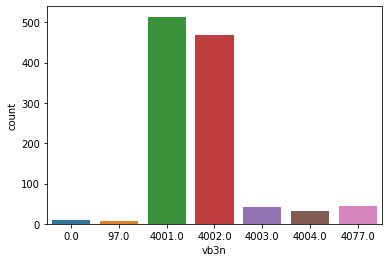

In [10]:
sns.countplot(x=y)
#Visible that dataset is imbalanced

In [11]:
#One Hot Encoding of categorical variables
cat = ['a4', 'np1', 'prot3', 'vic1ext', 'vb1', 'vb2', 'usvb1011', 'usvb20', 'aca6', 'q3c', 'q11n', 'etid']
dummies = pd.get_dummies(df[cat].astype(str), drop_first = True)
df_encode = pd.concat([df.drop(cat, axis = 1), dummies], axis = 1)
df_encode = df_encode.astype('int')
df_encode

,ls3,soct2,idio2,it1,l1b,aoj11,b1,b2,b3,b4,...,q11n_5.0,q11n_6.0,q11n_7.0,etid_4.0,etid_4003.0,etid_4004.0,etid_4005.0,etid_4006.0,etid_4008.0,etid_7.0
0,1,2,2,2,4,1,5,2,5,4,...,0,0,0,0,0,0,0,0,0,0
1,2,1,3,2,3,1,6,6,6,6,...,1,0,0,0,0,0,0,0,0,0
2,1,1,1,2,10,1,3,2,1,7,...,0,0,0,0,0,0,0,0,0,0
3,3,2,3,2,2,1,5,6,6,4,...,0,0,0,0,0,0,0,0,0,0
4,4,1,2,3,10,1,2,4,4,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,2,1,1,2,9,2,2,4,4,2,...,0,0,0,0,0,0,0,0,0,0
1495,2,3,2,2,1,2,5,3,6,5,...,0,1,0,0,1,0,0,0,0,0
1496,2,3,2,1,6,2,3,4,5,4,...,0,0,0,0,0,0,0,0,0,0
1497,1,2,1,2,6,2,5,5,5,4,...,0,0,0,0,0,0,0,0,0,0


In [12]:
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [13]:
y

array([2, 2, 3, ..., 6, 1, 2], dtype=int64)

In [14]:
#Stratified sampling to produce train-test sets
X_train, X_test, y_train, y_test = train_test_split(df_encode, y, stratify=y, test_size=0.2, random_state = 562)

In [15]:
#Oversampling to address imbalanced dataset
oversample = SMOTE(random_state = 42)
X_train, y_train = oversample.fit_resample(X_train, y_train)

## XGBoost Classifier Model

In [16]:
#XGBoost Classifier Model
xgb = XGBClassifier(eta = 0.1, objective = 'multi:softprob', max_depth = 5, min_child_weight = 15,
                    colsample_bytree = 0.84, n_estimators = 240, use_label_encoder = False, random_state = 562, eval_metric = roc_auc_score)
#xgb.set_params()
xgb.fit(X_train, y_train, verbose=0)
xgb_pred_prob = xgb.predict_proba(X_test)
xgb_pred = xgb.predict(X_test)

#Evaluation Metrics
metrics = ['roc', 'f1', 'acc', 'prec', 'recall']
roc = roc_auc_score(y_test, xgb_pred_prob, multi_class = 'ovo', average = 'weighted')
f1 = f1_score(y_test, xgb_pred, average = 'weighted')
acc = accuracy_score(y_test, xgb_pred)
prec = precision_score(y_test, xgb_pred, average = 'weighted')
recall = recall_score(y_test, xgb_pred, average = 'weighted')
xgb_scores = [roc, f1, acc, prec, recall]
for i in range(0, 5):
    print(metrics[i] + ':' + str(round(xgb_scores[i], 5)))

roc:0.81453
f1:0.81088
acc:0.81696
prec:0.81349
recall:0.81696


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

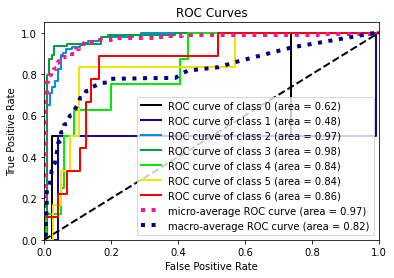

In [17]:
skplt.metrics.plot_roc(y_test, xgb_pred_prob)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

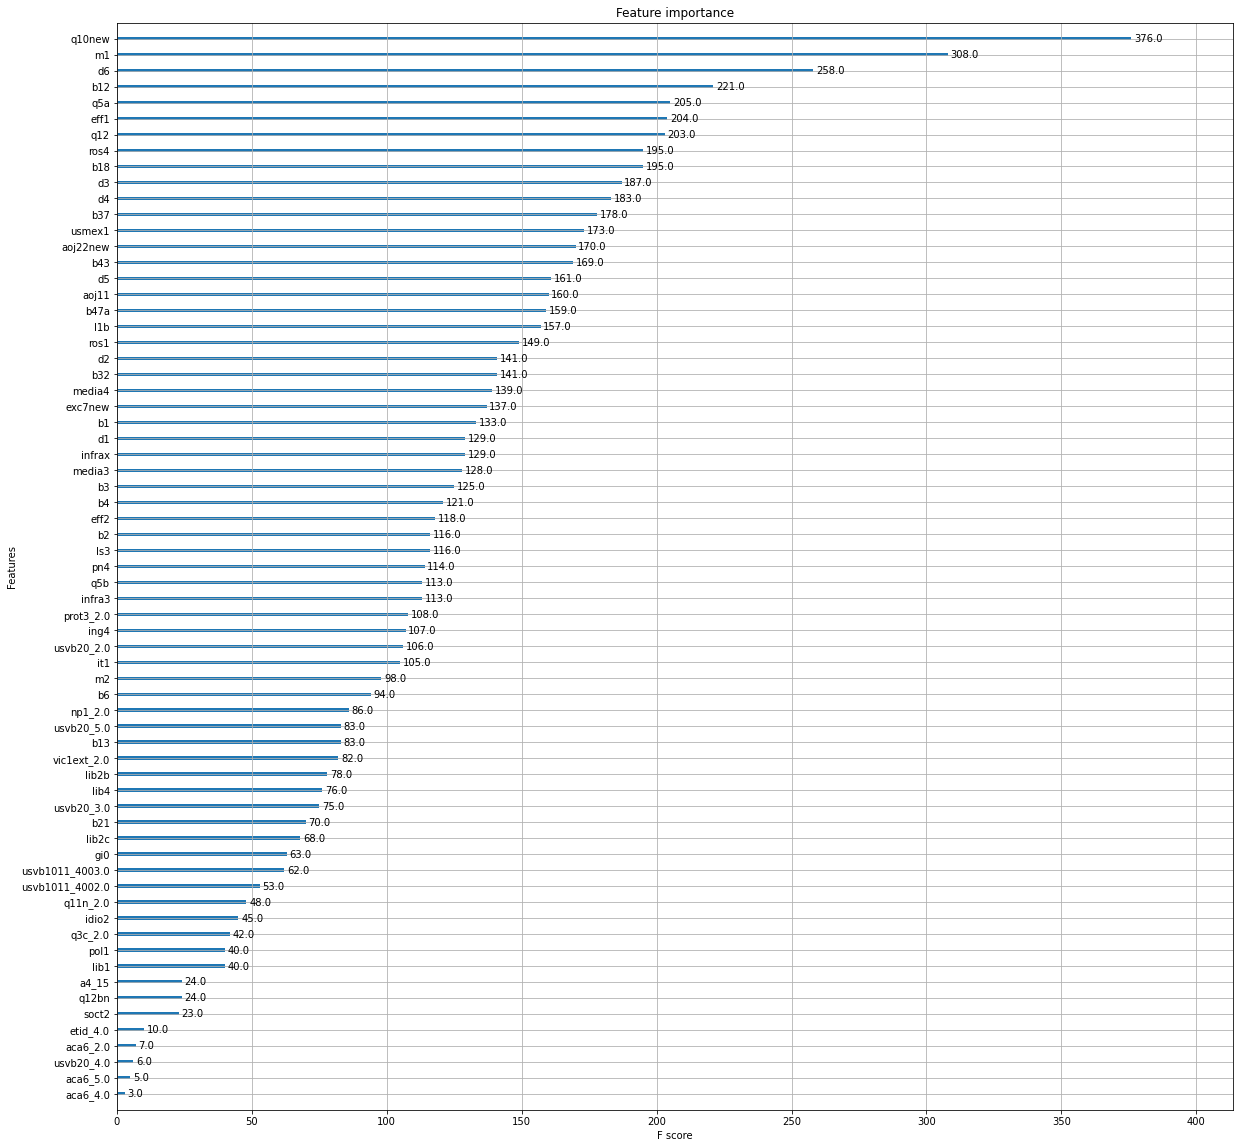

In [18]:
plt.rcParams["figure.figsize"] = (20,20)
plot_importance(xgb)

## Random Forest Classifier Model

In [19]:
#Random Forest Classifier Model
rf = RandomForestClassifier(n_estimators = 200, max_depth = 6, criterion = 'entropy', random_state = 562)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_pred_prob = rf.predict_proba(X_test)

roc = roc_auc_score(y_test, rf_pred_prob, multi_class = 'ovo', average = 'weighted')
f1 = f1_score(y_test, rf_pred, average = 'weighted')
acc = accuracy_score(y_test, rf_pred)
prec = precision_score(y_test, rf_pred, average = 'weighted')
recall = recall_score(y_test, rf_pred, average = 'weighted')
rf_scores = [roc, f1, acc, prec, recall]
for i in range(0, 5):
    print(metrics[i] + ':' + str(round(rf_scores[i], 5)))

roc:0.83605
f1:0.83834
acc:0.83482
prec:0.84874
recall:0.83482


## Logistic Regression Model

In [20]:
#Logistic Regression Model
logreg = LogisticRegression(random_state = 562, multi_class = 'multinomial', solver = 'saga', max_iter = 2000)
logreg.fit(X_train, y_train)
lr_pred = logreg.predict(X_test)
lr_pred_prob = logreg.predict_proba(X_test)

roc = roc_auc_score(y_test, lr_pred_prob, multi_class = 'ovo', average = 'weighted')
f1 = f1_score(y_test, lr_pred, average = 'weighted')
acc = accuracy_score(y_test, lr_pred)
prec = precision_score(y_test, lr_pred, average = 'weighted')
recall = recall_score(y_test, lr_pred, average = 'weighted')
lr_scores = [roc, f1, acc, prec, recall]
for i in range(0, 5):
    print(metrics[i] + ':' + str(round(lr_scores[i], 5)))

roc:0.7623
f1:0.79298
acc:0.79018
prec:0.79819
recall:0.79018


c:\users\jhsib\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Ensemble Model with all models

In [21]:
#Ensemble model: RF + XGB + LR
ensemble = VotingClassifier(estimators=[('lr', logreg), ('xgb', xgb), ('rf', rf)], voting = 'soft')
ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)
ensemble_pred_prob = ensemble.predict_proba(X_test)
metrics = ['roc', 'f1', 'acc', 'prec', 'recall']
roc = roc_auc_score(y_test, ensemble_pred_prob, multi_class = 'ovo', average = 'weighted')
f1 = f1_score(y_test, ensemble_pred, average = 'weighted')
acc = accuracy_score(y_test, ensemble_pred)
prec = precision_score(y_test, ensemble_pred, average = 'weighted')
recall = recall_score(y_test, ensemble_pred, average = 'weighted')
ens_scores = [roc, f1, acc, prec, recall]
for i in range(0, 5):
    print(metrics[i] + ':' + str(round(ens_scores[i], 5)))

roc:0.81764
f1:0.81972
acc:0.82143
prec:0.82292
recall:0.82143


In [22]:
#Ensemble model: RF + XGB
ensemble = VotingClassifier(estimators=[('xgb', xgb), ('rf', rf)], voting = 'soft')
ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)
ensemble_pred_prob = ensemble.predict_proba(X_test)
metrics = ['roc', 'f1', 'acc', 'prec', 'recall']
roc = roc_auc_score(y_test, ensemble_pred_prob, multi_class = 'ovo', average = 'weighted')
f1 = f1_score(y_test, ensemble_pred, average = 'weighted')
acc = accuracy_score(y_test, ensemble_pred)
prec = precision_score(y_test, ensemble_pred, average = 'weighted')
recall = recall_score(y_test, ensemble_pred, average = 'weighted')
ens_scores = [roc, f1, acc, prec, recall]
for i in range(0, 5):
    print(metrics[i] + ':' + str(round(ens_scores[i], 5)))

roc:0.83015
f1:0.81936
acc:0.82589
prec:0.82254
recall:0.82589


In [23]:
#Ensemble model: LR + XGB
ensemble = VotingClassifier(estimators=[('lr', logreg), ('rf', rf)], voting = 'soft')
ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)
ensemble_pred_prob = ensemble.predict_proba(X_test)
metrics = ['roc', 'f1', 'acc', 'prec', 'recall']
roc = roc_auc_score(y_test, ensemble_pred_prob, multi_class = 'ovo', average = 'weighted')
f1 = f1_score(y_test, ensemble_pred, average = 'weighted')
acc = accuracy_score(y_test, ensemble_pred)
prec = precision_score(y_test, ensemble_pred, average = 'weighted')
recall = recall_score(y_test, ensemble_pred, average = 'weighted')
ens_scores = [roc, f1, acc, prec, recall]
for i in range(0, 5):
    print(metrics[i] + ':' + str(round(ens_scores[i], 5)))

roc:0.81349
f1:0.79844
acc:0.79911
prec:0.80238
recall:0.79911


c:\users\jhsib\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
import pickle

In [25]:
# Save the model as a pickle file
with open('model.h', 'wb') as file:
    bin_dat = pickle.dump(ensemble, file)


In [26]:
# Laod the model from a pickle file
with open('model.h', 'rb') as file:
    loaded_model = pickle.load(file)
    
ensemble_pred = ensemble.predict(X_test)
ensemble_pred_prob = ensemble.predict_proba(X_test)
metrics = ['roc', 'f1', 'acc', 'prec', 'recall']
roc = roc_auc_score(y_test, ensemble_pred_prob, multi_class = 'ovo', average = 'weighted')
f1 = f1_score(y_test, ensemble_pred, average = 'weighted')
acc = accuracy_score(y_test, ensemble_pred)
prec = precision_score(y_test, ensemble_pred, average = 'weighted')
recall = recall_score(y_test, ensemble_pred, average = 'weighted')
ens_scores = [roc, f1, acc, prec, recall]
for i in range(0, 5):
    print(metrics[i] + ':' + str(round(ens_scores[i], 5)))

roc:0.81349
f1:0.79844
acc:0.79911
prec:0.80238
recall:0.79911


c:\users\jhsib\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
